<a href="https://colab.research.google.com/github/asim5800/Online-Retail-Customer-Segmentation-/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline



from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from plotnine import *

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Online Retail Customer Segmentation-Asim Siddiqui/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
print('Number of redundant entries in dataset:',df.duplicated().sum())

Number of redundant entries in dataset: 5268


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(536641, 8)

In [ ]:
for col in df:
    print(df[col].nunique())

25900
4070
4223
722
23260
1630
4372
38


In [ ]:
print(df.apply(lambda col: col.unique()))

InvoiceNo      [536365, 536366, 536367, 536368, 536369, 53637...
StockCode      [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
Description    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
Quantity       [6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...
InvoiceDate    [2010-12-01T08:26:00.000000000, 2010-12-01T08:...
UnitPrice      [2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...
CustomerID     [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...
Country        [United Kingdom, France, Australia, Netherland...
dtype: object


In [ ]:
df[df.Quantity < 0].shape[0]

10587

In [ ]:
df[df.UnitPrice < 0].shape[0]

2

In [ ]:
len(df[(df['Quantity']<0)])

10587

In [ ]:
df1 = df.drop(df[(df.Quantity < 0)|(df.UnitPrice < 0)].index)

In [ ]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,526052.000000,526052.000000,392732.000000
mean,10.730911,3.913818,15287.734822
std,157.592136,36.053205,1713.567773
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526052 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526052 non-null  object        
 1   StockCode    526052 non-null  object        
 2   Description  525460 non-null  object        
 3   Quantity     526052 non-null  int64         
 4   InvoiceDate  526052 non-null  datetime64[ns]
 5   UnitPrice    526052 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      526052 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.1+ MB


In [ ]:
#sns.pairplot(df1)

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
df1['InvoiceNo'] = df1['InvoiceNo'].astype('str')

In [ ]:
df1['InvoiceNo'].str.contains('C').value_counts()

False    392732
Name: InvoiceNo, dtype: int64

In [ ]:

df1=df1[~df1['InvoiceNo'].str.contains('C')]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


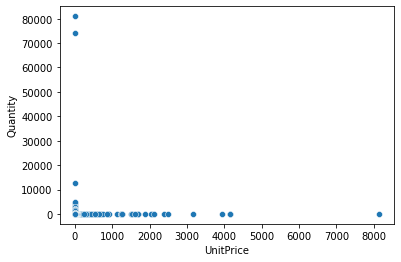

In [ ]:

sns.scatterplot(x='UnitPrice',y='Quantity',data=df1);

In [ ]:
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
df1['Day']=df1['InvoiceDate'].dt.day_name()

In [ ]:
df1["year"] = df1["InvoiceDate"].apply(lambda x: x.year)
df1["month"] = df1["InvoiceDate"].apply(lambda x: x.month)
df1["month_day"] = df1["InvoiceDate"].apply(lambda x: x.day)
df1["hour"] = df1["InvoiceDate"].apply(lambda x: x.hour)

In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8


In [ ]:
df1.shape

(392732, 13)

In [ ]:
df1['Country'].nunique()

37

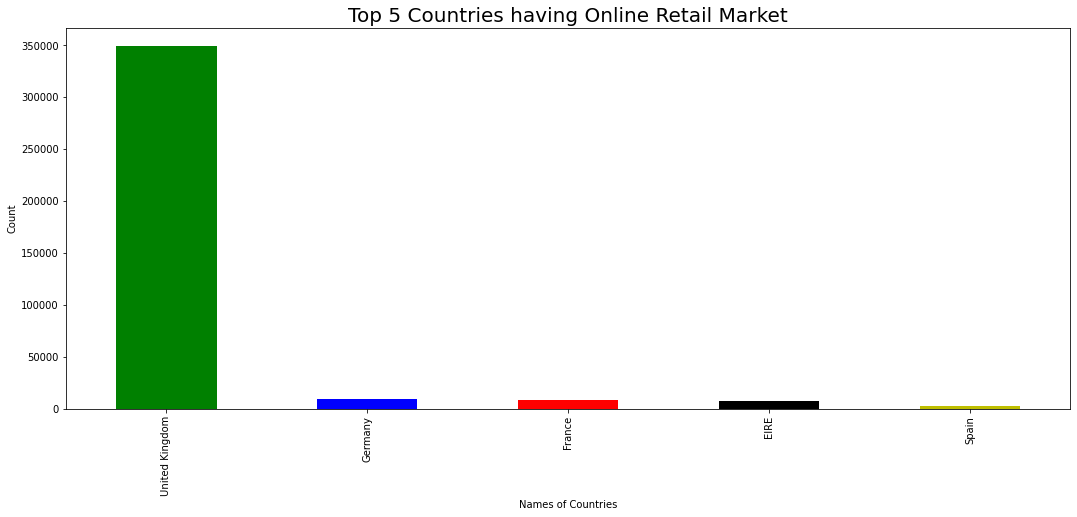

In [ ]:

# checking the different values for country in the dataset
my_colors = ['g', 'b', 'r', 'k', 'y', 'm', 'c']
df1['Country'].value_counts().head(5).plot.bar(figsize = (18, 7),color=my_colors)
plt.title('Top 5 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

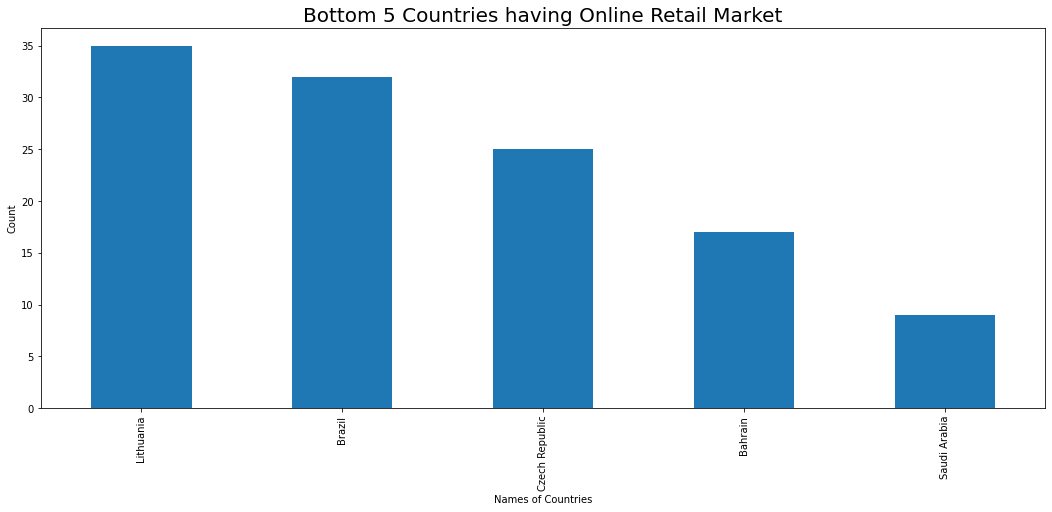

In [ ]:
df1['Country'].value_counts().tail(5).plot.bar(figsize = (18, 7))
plt.title('Bottom 5 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [ ]:
df1['Description'].nunique()

3877

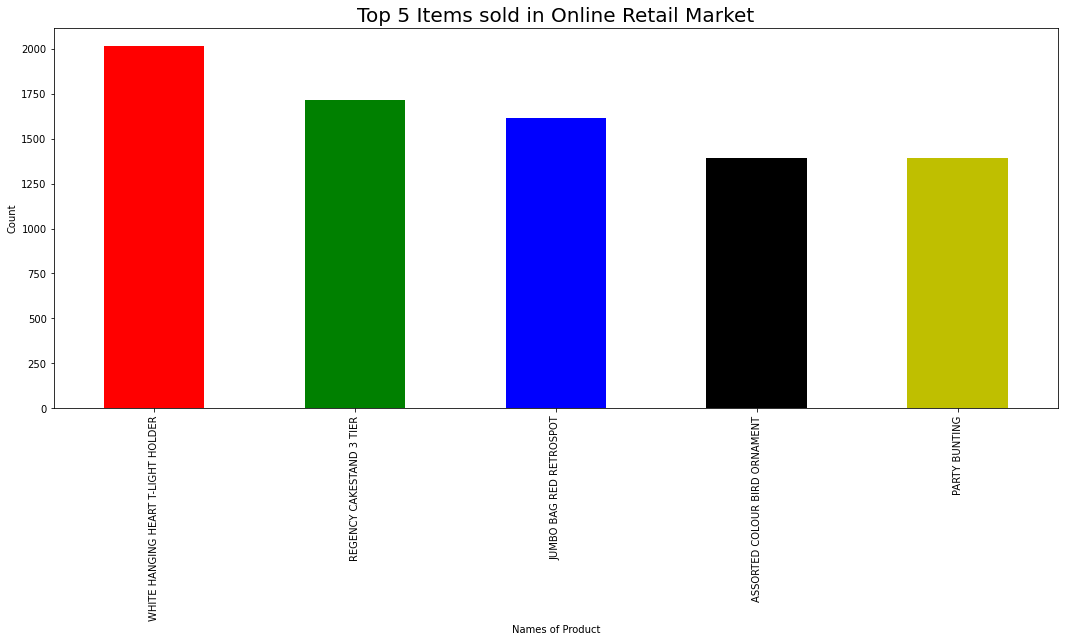

In [ ]:
my_colors1 = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
df1['Description'].value_counts().head(5).plot.bar(figsize = (18, 7),color=my_colors1)
plt.title('Top 5 Items sold in Online Retail Market', fontsize = 20)
plt.xlabel('Names of Product')
plt.ylabel('Count')
plt.show()

In [ ]:
df1['Description'].value_counts().tail(200)

POLYESTER FILLER PAD 60x40cm         1
BLUE PADDED SOFT MOBILE              1
PURPLE/BLUE CERAMIC CANDLE HOLDER    1
PINK DAISY BAG CHARM                 1
DIAMANTE HAIR GRIP PACK/2 CRYSTAL    1
                                    ..
LIGHT DECORATION BATTERY OPERATED    1
UNION JACK HOT WATER BOTTLE          1
VINTAGE BLUE TINSEL REEL             1
GLASS AND BEADS BRACELET IVORY       1
NEW BAROQUE B'FLY NECKLACE GREEN     1
Name: Description, Length: 200, dtype: int64

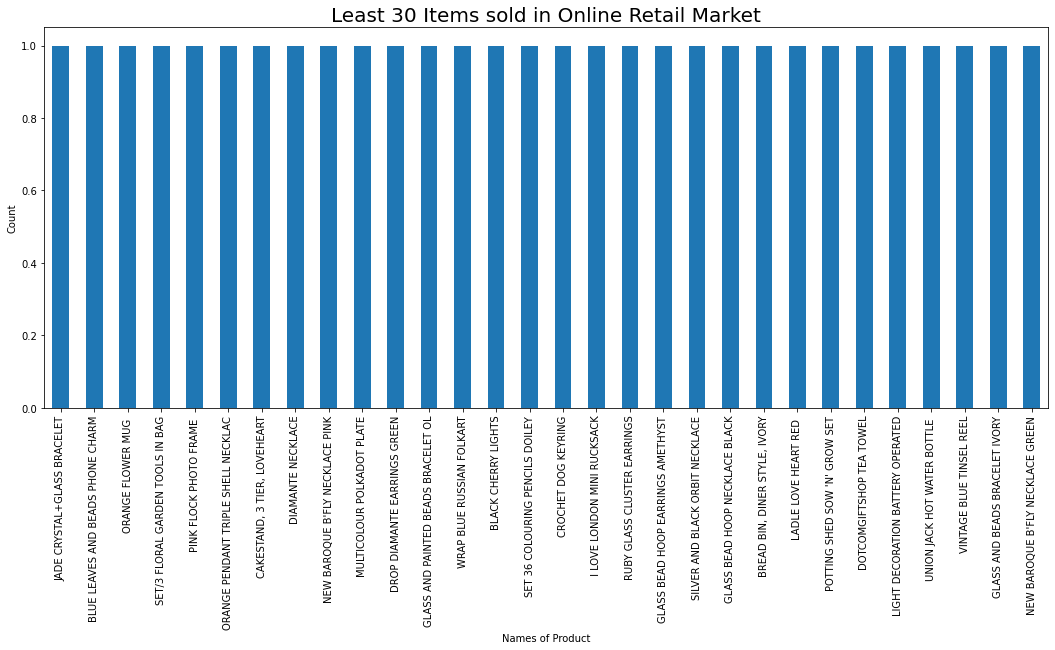

In [ ]:
df1['Description'].value_counts().tail(30).plot.bar(figsize = (18, 7))
plt.title('Least 30 Items sold in Online Retail Market', fontsize = 20)
plt.xlabel('Names of Product')
plt.ylabel('Count')
plt.show()


In [ ]:
df1['CustomerID'].nunique()# so we have in total 4339 customers

4339

In [ ]:
df1['CustomerID'].value_counts()

17841.0    7676
14911.0    5672
14096.0    5111
12748.0    4413
14606.0    2677
           ... 
18233.0       1
18184.0       1
17846.0       1
14090.0       1
16093.0       1
Name: CustomerID, Length: 4339, dtype: int64

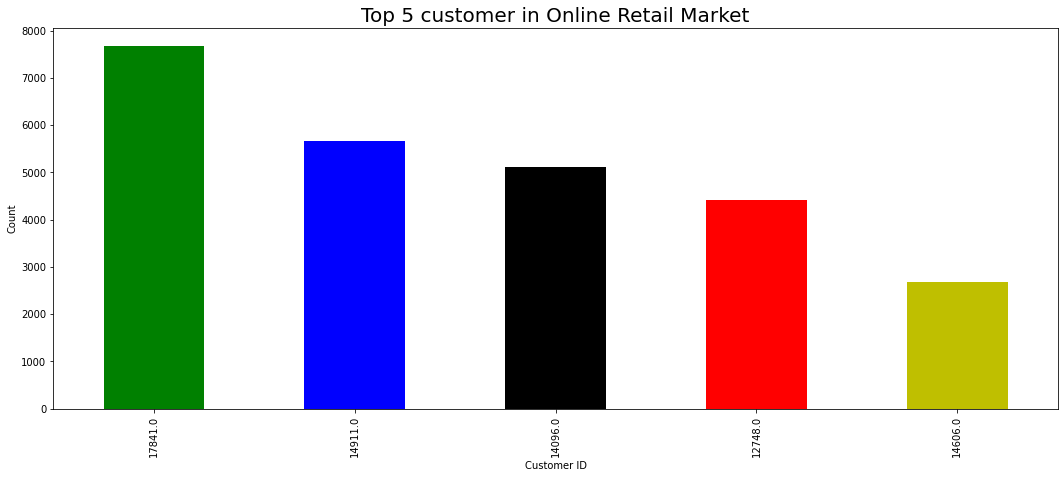

In [ ]:
my_colors2 = ['g', 'b', 'k', 'r', 'y', 'm', 'c']
df1['CustomerID'].value_counts().head(5).plot.bar(figsize = (18, 7),color=my_colors2)
plt.title('Top 5 customer in Online Retail Market', fontsize = 20)
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.show()

In [ ]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Day', 'year', 'month',
       'month_day', 'hour'],
      dtype='object')

In [ ]:

# creating function for plotting graph 
def plot_count(parameter,datasource):
   sns.set_style("whitegrid")
   fig, ax = plt.subplots()
   fig.set_size_inches(15, 9)
   p=sns.countplot(x=parameter, data=datasource)


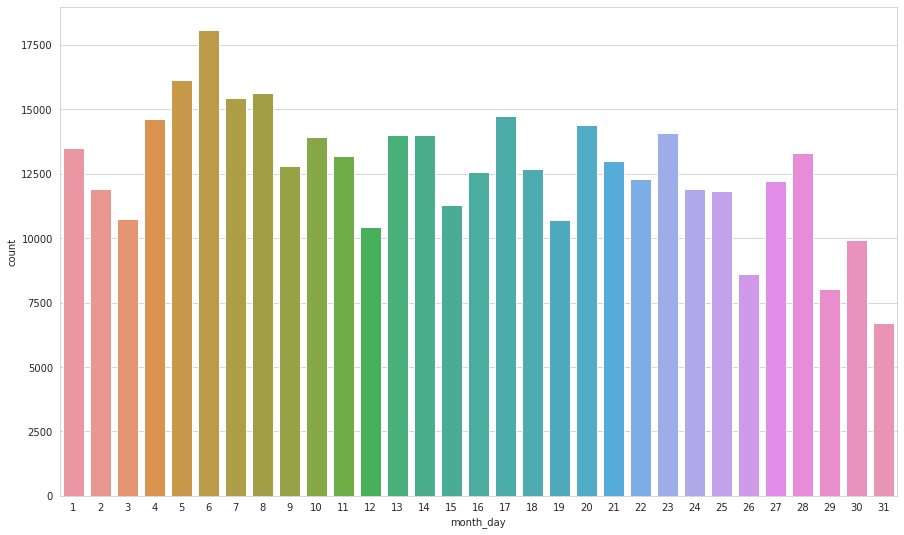

In [ ]:
plot_count('month_day',df1)

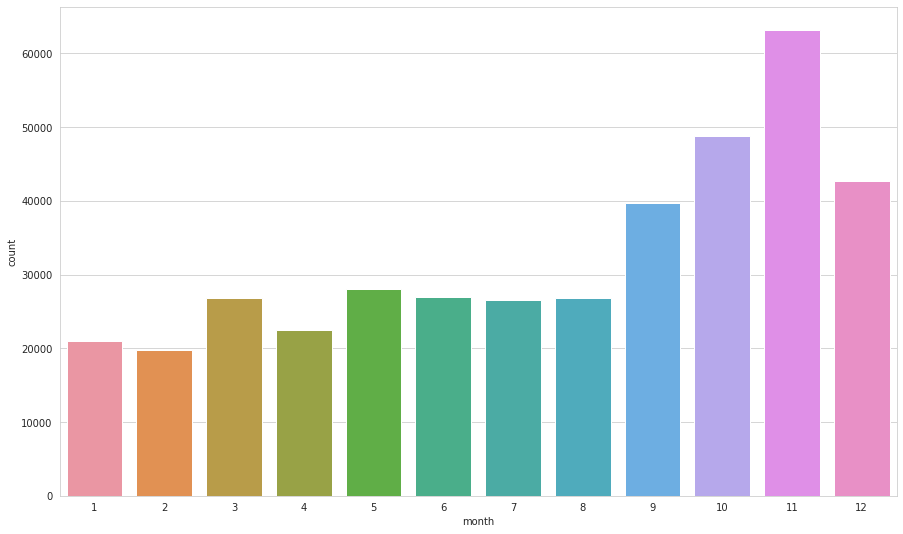

In [ ]:
plot_count('month',df1)

In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8


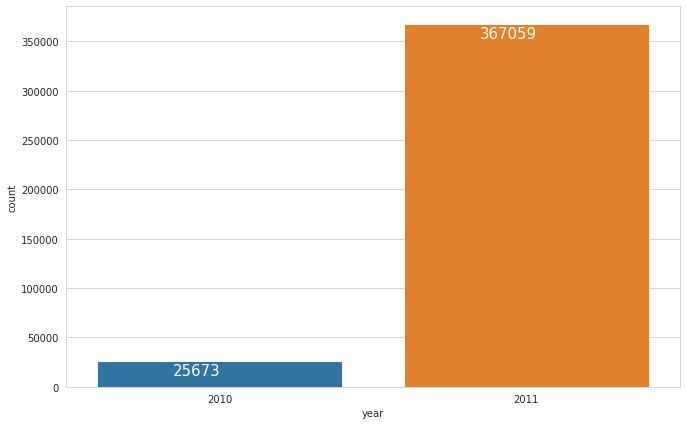

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
op=sns.countplot(x='year', data=df1)

for p in op.patches:
    op.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), va='center', color='white', size=15)
plt.show()

In [ ]:
df1['Day'].value_counts()

Thursday     79260
Wednesday    68043
Tuesday      65747
Monday       64237
Sunday       61214
Friday       54231
Name: Day, dtype: int64

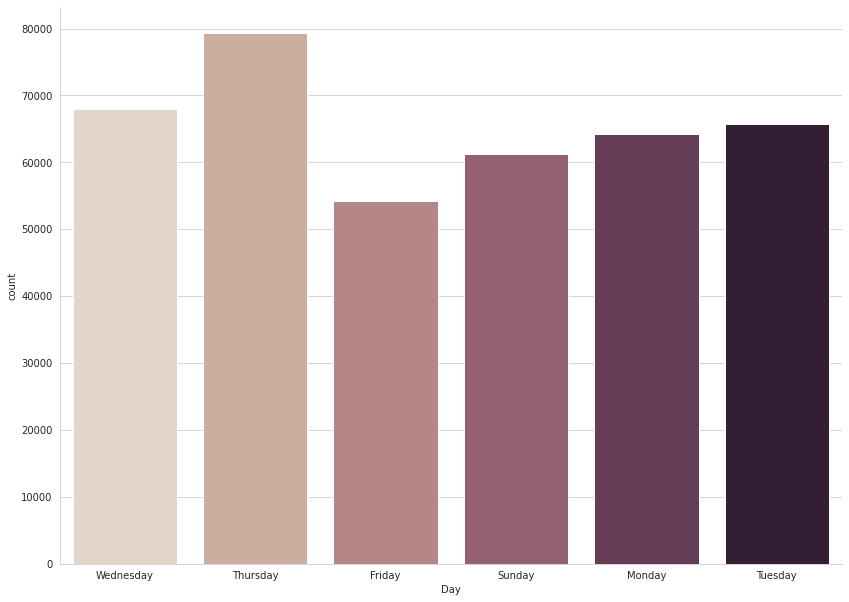

In [ ]:

sns.catplot(x="Day", kind="count", palette="ch:.25", data=df1,height=8.27, aspect=11.7/8.27);

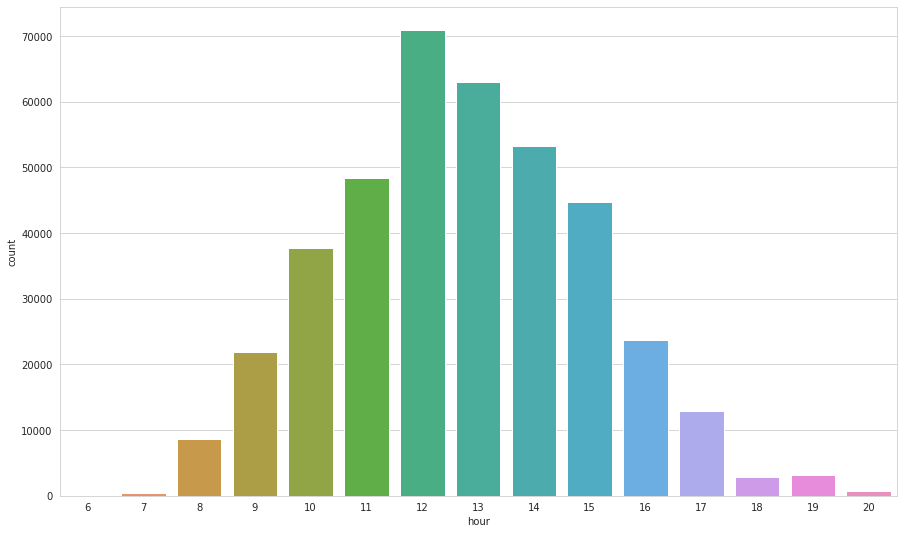

In [ ]:
plot_count('hour',df1)

In [ ]:
df1['Tot_amt']  = df1.Quantity * df1.UnitPrice


In [ ]:

df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,20.34


In [ ]:
df1['CustomerID'].nunique()

4339

In [ ]:
gk = df1.groupby('CustomerID')

In [ ]:
gk.first()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Day,year,month,month_day,hour,Tot_amt
CustomerID,,,,,,,,,,,,,
12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,Tuesday,2011,1,18,10,77183.60
12347.0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,Tuesday,2010,12,7,14,25.20
12348.0,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,Finland,Thursday,2010,12,16,19,39.60
12349.0,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,Italy,Monday,2011,11,21,9,15.00
12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,Norway,Wednesday,2011,2,2,16,25.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-03-07 09:52:00,7.90,United Kingdom,Monday,2011,3,7,9,23.70
18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,United Kingdom,Sunday,2011,6,12,10,5.04
18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,2011-08-05 13:35:00,12.75,United Kingdom,Friday,2011,8,5,13,12.75


In [ ]:
max_index = df1['Tot_amt'].idxmax()
max_row = df1.loc[[max_index]]
max_row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,Friday,2011,12,9,9,168469.6


In [ ]:
max_index = gk['Tot_amt'].idxmax()
max_index

CustomerID
12346.0     61619
12347.0    148290
12348.0     34099
12349.0    485574
12350.0     80335
            ...  
18280.0    111045
18281.0    222957
18282.0    519825
18283.0    494115
18287.0    198741
Name: Tot_amt, Length: 4339, dtype: int64

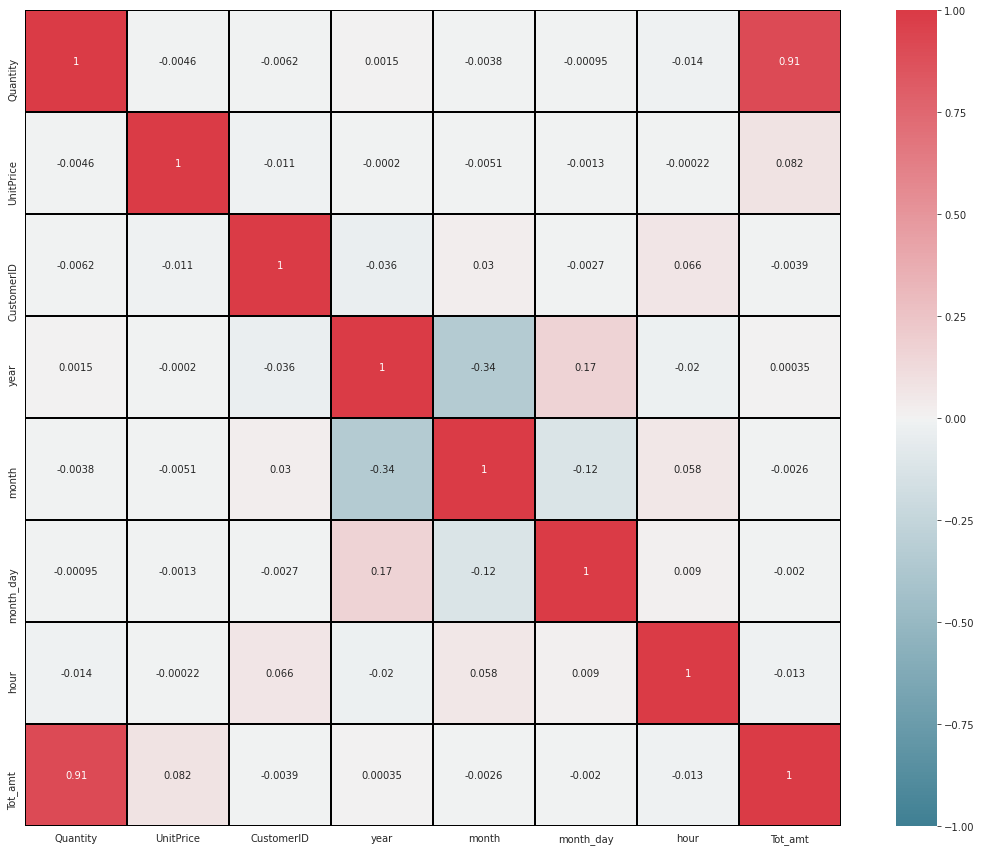

In [ ]:

# how all feautures are related to each other

f, ax = plt.subplots(figsize=(20,15))

corr = df1.corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

In [ ]:
gk['Tot_amt'].value_counts()

CustomerID  Tot_amt
12346.0     77183.6     1
12347.0     15.0       24
            17.0       16
            13.2       14
            19.8       12
                       ..
18287.0     45.0        1
            52.2        1
            53.1        1
            59.4        1
            87.0        1
Name: Tot_amt, Length: 142615, dtype: int64

In [ ]:
amount = df1.sort_values(by=['Tot_amt'], ascending=False)

In [ ]:
amount.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,Friday,2011,12,9,9,168469.6
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,Tuesday,2011,1,18,10,77183.6
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,Friday,2011,6,10,15,38970.0


In [ ]:
amount.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.0,16133.0,United Kingdom,Sunday,2011,9,25,12,0.0
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.0,13081.0,United Kingdom,Thursday,2011,11,10,11,0.0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,Wednesday,2011,3,23,10,0.0


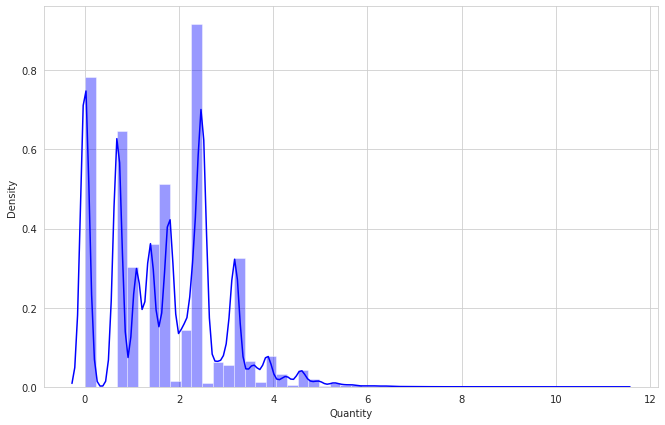

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(np.log(df1['Quantity']),color="B");

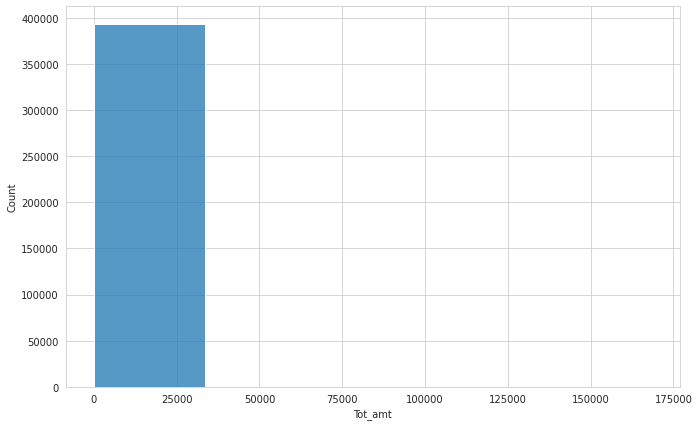

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(df1['Tot_amt'], kde = False,bins=5);

In [ ]:
#sns.pairplot(amount, hue="Day")

In [ ]:
# First we will keep a copy of data
df_cust = df1.copy()

RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Customer ID / Email / Name etc: to identify them

Recency (R) as days since last purchase: How many days ago was their last purchase?

Frequency (F) as total number of transactions: How many times has the customer purchased from our store?

Monetary (M) as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent?

Quintiles is our recommended method to calculate RFM score

0-20 = 1st quintile

20-40 = 2nd quintile

40-60 = 3rd quintile

60-80 = 4th quintile

80-100 = 5th quintile

RFM calculations summary

Take your customer data, give a score from 1-5 to R, F and M values. Using quintiles works best since it works for all businesses and adjusts according to your data.



In [ ]:
df_working=df1[df1.Country=='United Kingdom']

In [ ]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  object        
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      349227 non-null  object        
 8   Day          349227 non-null  object        
 9   year         349227 non-null  int64         
 10  month        349227 non-null  int64         
 11  month_day    349227 non-null  int64         
 12  hour         349227 non-null  int64         
 13  Tot_amt      349227 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 40.0+ MB


In [ ]:
uk_data=df_working[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice','Tot_amt']]

In [ ]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Tot_amt
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [ ]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [ ]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Tot_amt': lambda price: price.sum()})


In [ ]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'Tot_amt'], dtype='object')

In [ ]:
rfm.columns=['recency','frequency','monetary']

In [ ]:
rfm['recency'] = rfm['recency'].astype(int)

In [ ]:
rfm.reset_index(inplace = True)
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [ ]:
rfm.columns

Index(['CustomerID', 'recency', 'frequency', 'monetary'], dtype='object')

Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

In [ ]:
rfm.describe()

,CustomerID,recency,frequency,monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,89.065800,1857.950687
std,1576.823683,99.528532,214.022733,7477.736186
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,17.000000,17.000000,298.110000
50%,15569.000000,50.000000,40.000000,644.300000
75%,16913.000000,142.000000,98.000000,1570.810000
max,18287.000000,373.000000,7676.000000,259657.300000


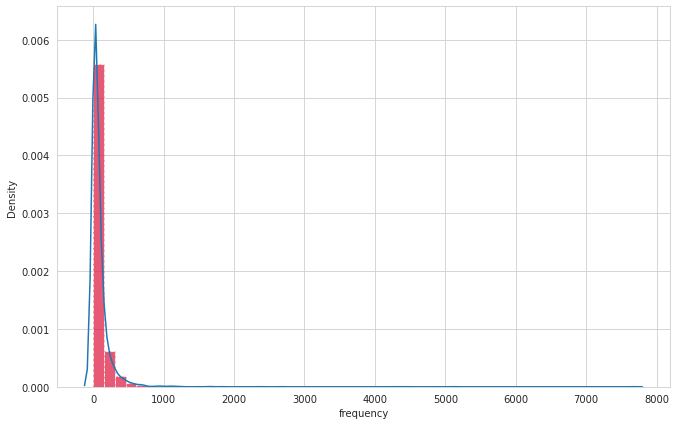

In [ ]:
#checkig age distribution in our dataset
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rfm["frequency"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7});

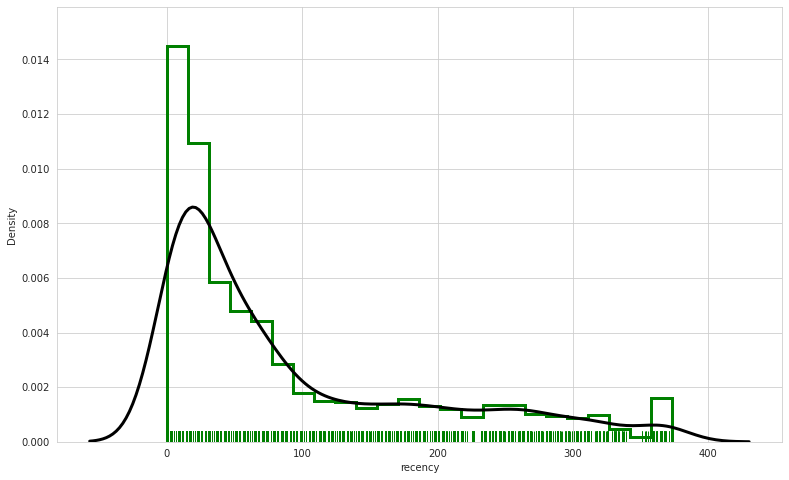

In [ ]:
x= rfm['recency']

plt.figure(figsize=(13,8))
sns.distplot(x, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"},
        
             )

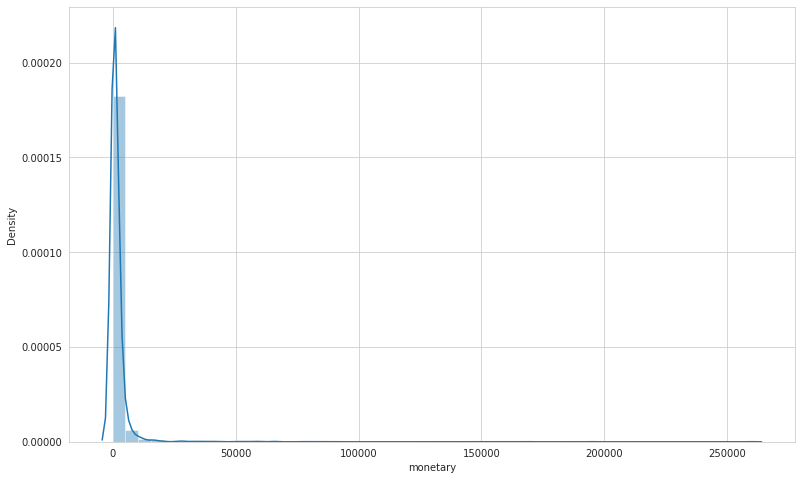

In [ ]:
x = rfm['monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

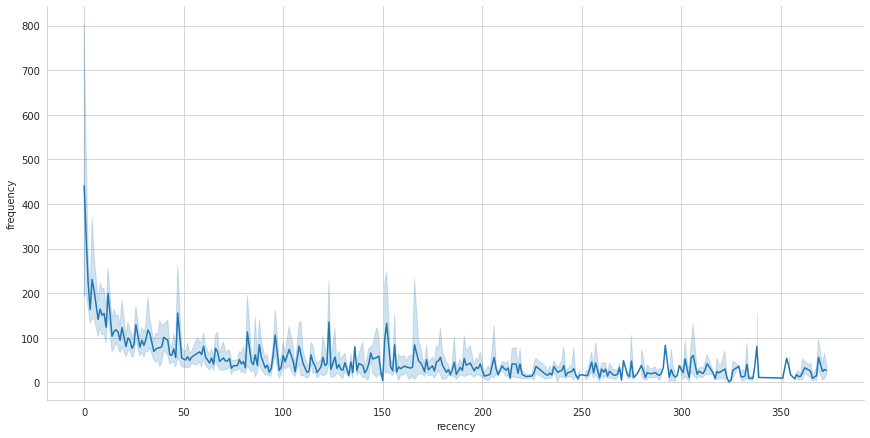

In [ ]:
sns.relplot(x="recency", y="frequency", kind="line", data=rfm,height=6,aspect=2 );

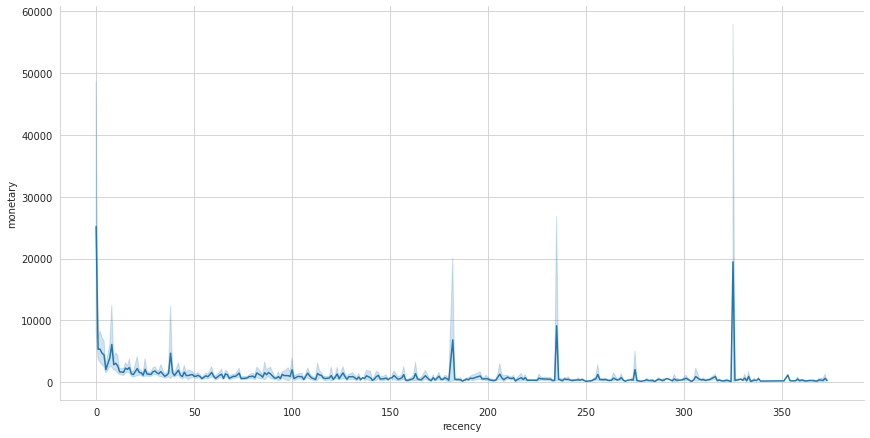

In [ ]:
sns.relplot(x="recency", y="monetary", kind="line", data=rfm,height=6,aspect=2);

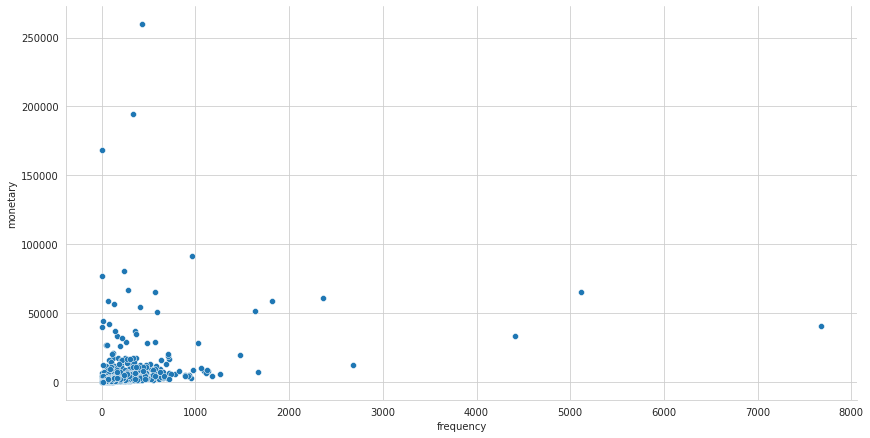

In [ ]:
sns.relplot(x="frequency", y="monetary", kind="scatter", data=rfm,height=6,aspect=2);

In [ ]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 5, ['1','2','3','4','5'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 5, ['5','4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 5, ['5','4','3','2','1'])

In [ ]:
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,12346.0,325,1,77183.60,5,5,1
1,12747.0,2,103,4196.01,1,2,1
2,12748.0,0,4413,33053.19,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


In [ ]:
rfm['rfm_rating'] = rfm.r_quartile.astype(int)+ rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)
rfm['rfm_concat'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat
0,12346.0,325,1,77183.60,5,5,1,11,551
1,12747.0,2,103,4196.01,1,2,1,4,121
2,12748.0,0,4413,33053.19,1,1,1,3,111
3,12749.0,3,199,4090.88,1,1,1,3,111
4,12820.0,3,59,942.34,1,2,2,5,122


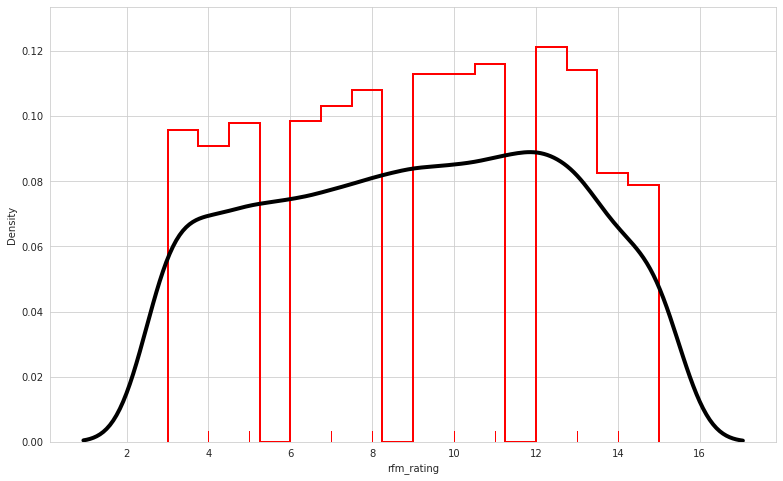

In [ ]:
x= rfm['rfm_rating']

plt.figure(figsize=(13,8))
sns.distplot(x, rug=True, rug_kws={"color": "r"},
                  kde_kws={"color": "k", "lw": 4, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "r"},
        
             )

In [ ]:
df_cust = rfm.copy()

In [ ]:
df_cust.isin([0]).any().any()

True

In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  3921 non-null   float64 
 1   recency     3921 non-null   int64   
 2   frequency   3921 non-null   int64   
 3   monetary    3921 non-null   float64 
 4   r_quartile  3921 non-null   category
 5   f_quartile  3921 non-null   category
 6   m_quartile  3921 non-null   category
 7   rfm_rating  3921 non-null   int64   
 8   rfm_concat  3921 non-null   object  
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 196.0+ KB


In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm['recency'] = [handle_neg_n_zero(x) for x in rfm.recency]
rfm['monetary'] = [handle_neg_n_zero(x) for x in rfm.monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm[['recency', 'frequency', 'monetary']].apply(np.log, axis = 1).round(3)

In [ ]:
from sklearn import preprocessing
from numpy import math
rfm['recency_log'] = rfm['recency'].apply(math.log)
rfm['frequency_log'] = rfm['frequency'].apply(math.log)
rfm['monetary_log'] = rfm['monetary'].apply(math.log)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['recency_log','monetary_log']
X_features_rec_mon=rfm[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42245969115581433
For n_clusters = 3, silhouette score is 0.34645503970350383
For n_clusters = 4, silhouette score is 0.3659009578745068
For n_clusters = 5, silhouette score is 0.33815088655582626
For n_clusters = 6, silhouette score is 0.3435917557480292
For n_clusters = 7, silhouette score is 0.34531885397481943
For n_clusters = 8, silhouette score is 0.3398606998971555
For n_clusters = 9, silhouette score is 0.34595132468881806
For n_clusters = 10, silhouette score is 0.3458690581833918
For n_clusters = 11, silhouette score is 0.33643105141739194
For n_clusters = 12, silhouette score is 0.3430814750375897
For n_clusters = 13, silhouette score is 0.3441133679268754
For n_clusters = 14, silhouette score is 0.3403932121818733
For n_clusters = 15, silhouette score is 0.33764545818077235


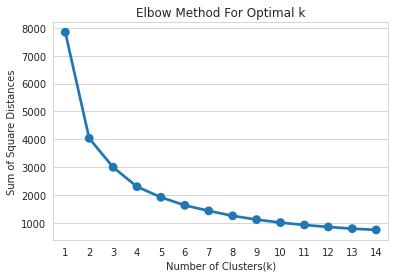

In [ ]:
features_rec_mon=['recency_log','monetary_log']
X_features_rec_mon=rfm[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

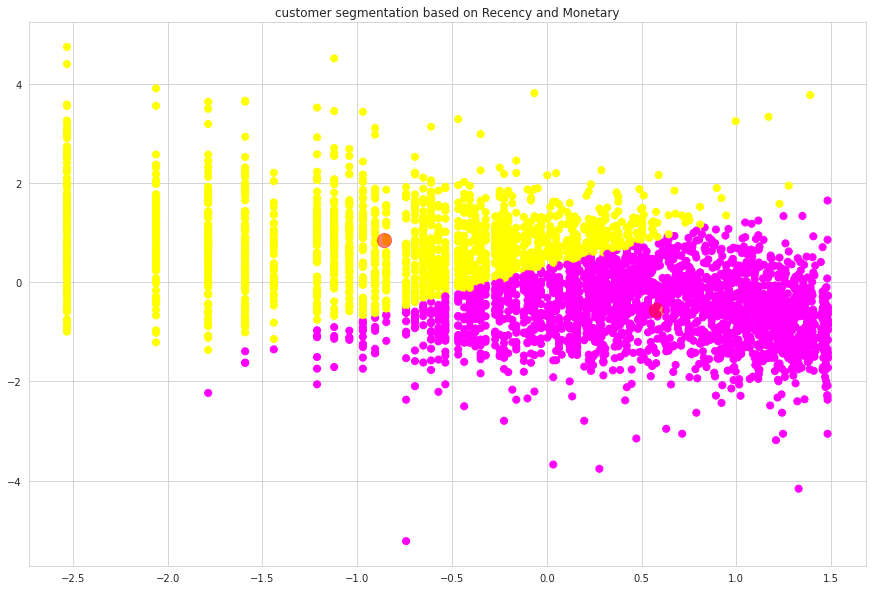

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
feature_vector=['recency_log','frequency_log','monetary_log']
X_features=rfm[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.39564327592299686
For n_clusters = 3 The average silhouette_score is : 0.30681290240921677
For n_clusters = 4 The average silhouette_score is : 0.2984659739981942
For n_clusters = 5 The average silhouette_score is : 0.28066853006266396
For n_clusters = 6 The average silhouette_score is : 0.2781574659497782


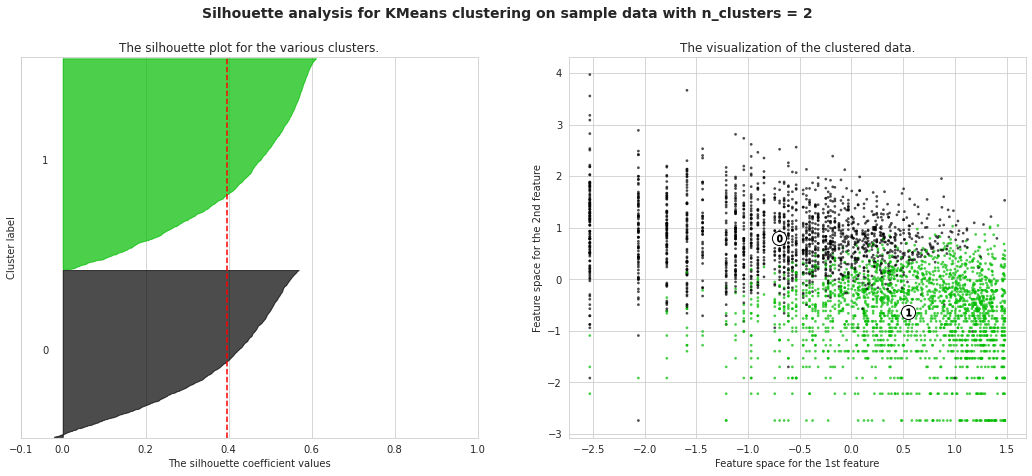

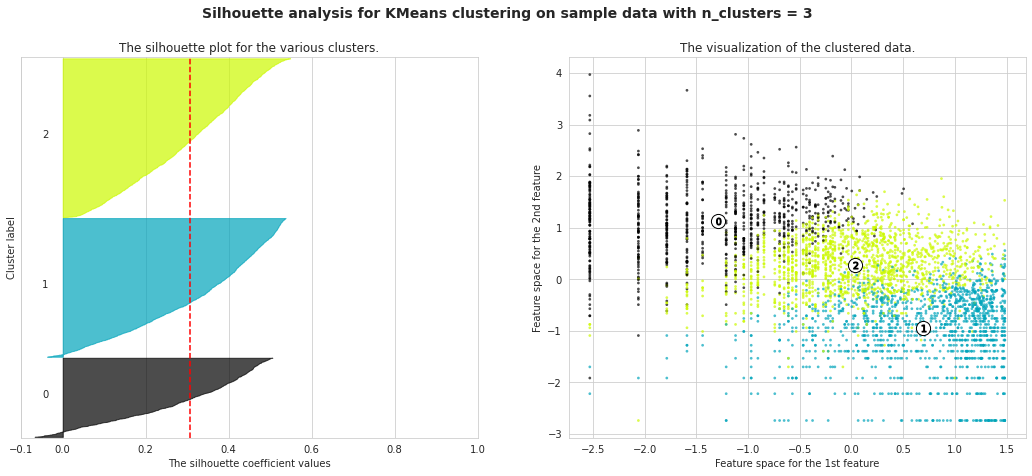

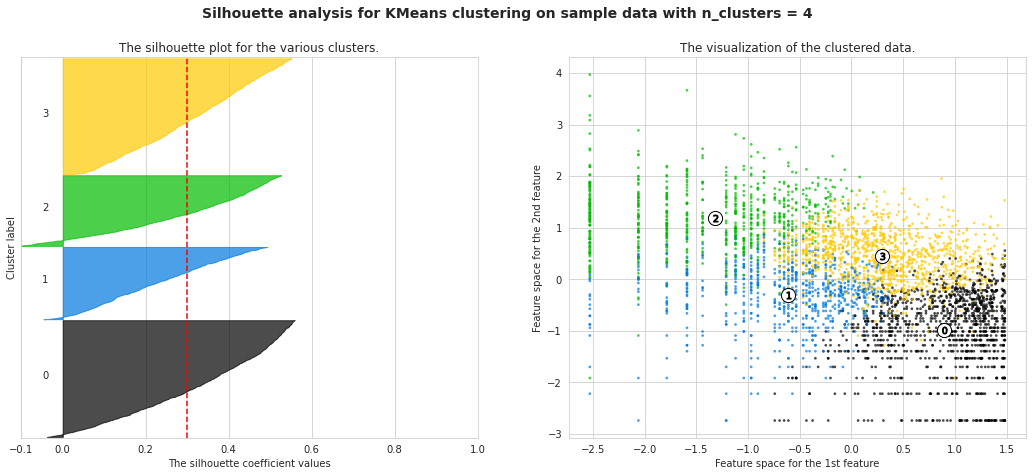

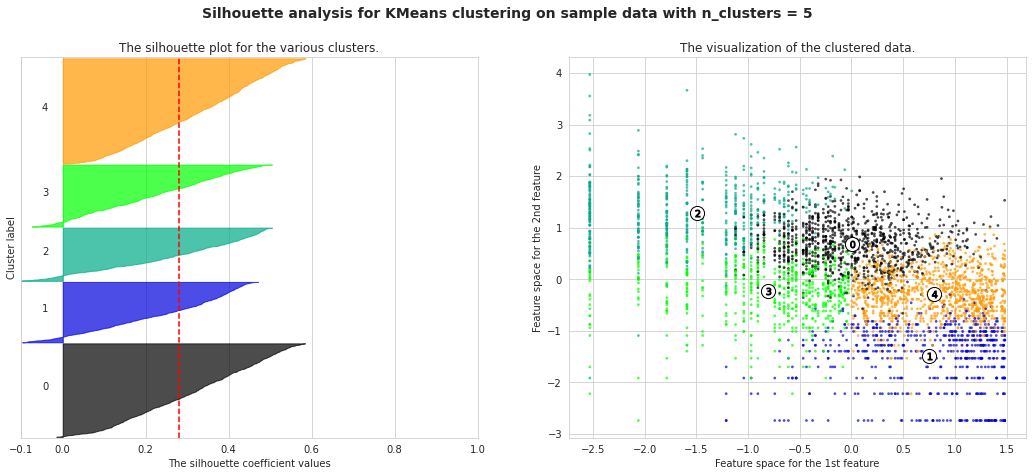

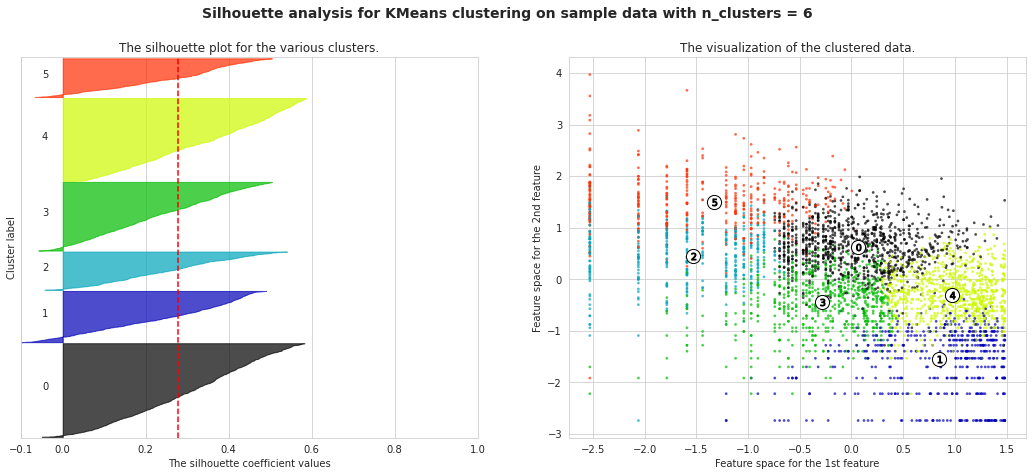

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

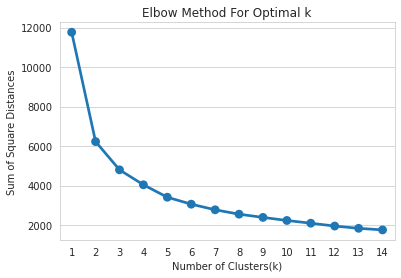

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:

#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm['Cluster'] = KMean_clust.labels_
rfm.head(10)

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster
0,12346.0,325,1,77183.60,5,5,1,11,551,5.783825,0.000000,11.253942,1
1,12747.0,2,103,4196.01,1,2,1,4,121,0.693147,4.634729,8.341889,0
2,12748.0,1,4413,33053.19,1,1,1,3,111,0.000000,8.392310,10.405873,0
3,12749.0,3,199,4090.88,1,1,1,3,111,1.098612,5.293305,8.316515,0
4,12820.0,3,59,942.34,1,2,2,5,122,1.098612,4.077537,6.848366,0
5,12821.0,214,6,92.72,5,5,5,15,555,5.365976,1.791759,4.529584,1
6,12822.0,70,46,948.88,3,3,2,8,332,4.248495,3.828641,6.855282,1
7,12823.0,74,5,1759.50,4,5,2,11,452,4.304065,1.609438,7.472785,1
8,12824.0,59,25,397.12,3,4,4,11,344,4.077537,3.218876,5.984239,1
9,12826.0,2,91,1474.72,1,2,2,5,122,0.693147,4.510860,7.296223,0


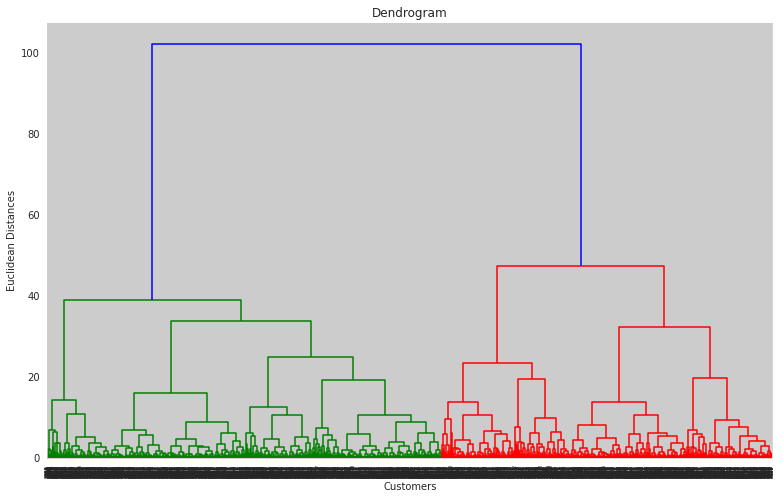

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

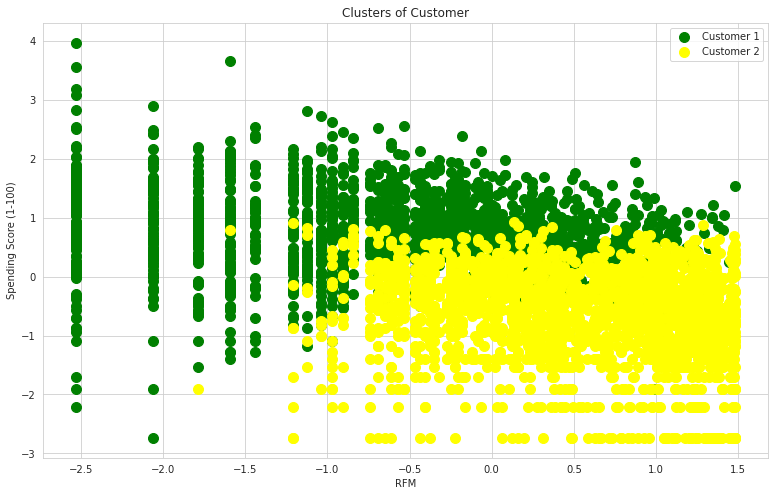

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
df_scaled.head(2)

In [ ]:
# Scatter Plot  of Clusters
fig = plt.figure(num=None, figsize=(10, 8))
plt.scatter(df0['recency'],df0['rfm_rating'],color='blue')
plt.scatter(df01['CustomerID'],df01['rfm_rating'],color='green')
plt.scatter(df02['CustomerID'],df02['rfm_rating'],color='red')
plt.scatter(df03['CustomerID'],df03['rfm_rating'],color='yellow')
plt.xlabel('Features')
plt.ylabel('Cluster')


In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_plot(X, y, n_clusters, ax=None):
	if ax is None:
		ax = plt.gca()
		# Compute the silhouette scores for each sample
		silhouette_avg = silhouette_score(X, y)
		sample_silhouette_values = silhouette_samples(X, y)
		y_lower = padding = 2
		for i in range(n_clusters):
	# Aggregate the silhouette scores for samples belonging to
			ith_cluster_silhouette_values = sample_silhouette_values[y == i]
			ith_cluster_silhouette_values.sort()
			size_cluster_i = ith_cluster_silhouette_values.shape[0]
			y_upper = y_lower + size_cluster_i
			color = cm.nipy_spectral(float(i) / n_clusters)
			ax.fill_betweenx(np.arange(y_lower, y_upper),
							0,ith_cluster_silhouette_values,
							facecolor=color,
							edgecolor=color,
							alpha=0.7)
			# Label the silhouette plots with their cluster numbers at the middle
			ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
			# Compute the new y_lower for next plot
			y_lower = y_upper + padding
		ax.set_xlabel("The silhouette coefficient values")
		ax.set_ylabel("Cluster label")
		# The vertical line for average silhoutte score of all the values
		ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
		ax.annotate('Average',
					xytext=(silhouette_avg, y_lower * 1.025),
					xy=(0, 0),
					ha='center',
					alpha=0.8,
					c='r')
		ax.set_yticks([]) # Clear the yaxis labels / ticks
		ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
		ax.set_ylim(0, y_upper + 1)
		ax.set_xlim(-0.075, 1.0)
		return ax

In [ ]:
### Silhoutte Plot
silhouette_plot(df_cust,y_pred,4,ax=None)

In [ ]:
### Silhoutte Plot
silhouette_plot(df_cust,y_pred,3,ax=None)

In [ ]:
### Silhoutte Plot
silhouette_plot(df_cust,y_pred,2,ax=None)

In [ ]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
#wcss_values = []#
#for i in range(1,20):
#  kmeans = KMeans(n_clusters=i, init='k-means++')
#  kmeans.fit(normalized_df)
#  wcss_values.append(kmeans.inertia_)

In [ ]:
del df_cust['column_name']

In [ ]:
df_cust1=df_cust[]

In [ ]:
df_scaled = normalize(df_cust1)

In [ ]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)